In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
from sklearn.datasets import load_digits
df = load_digits()
feat = df.data

In [57]:
x = pd.DataFrame(feat, columns=df.feature_names)
x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [58]:
y = df.target
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
print(x.shape)
print(len(y))

(1797, 64)
1797


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


## 1. Logistic Regression

In [61]:
import warnings
warnings.filterwarnings("ignore")
model1 = LogisticRegression()
params = {'C' : [0.001,0.01,0.1,1,10]}

search = RandomizedSearchCV(model1, params, cv=3, scoring='accuracy', verbose=15, n_jobs=3)
search.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done  12 out of  15 | elapsed:    5.4s remaining:    1.3s
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    5.7s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=3,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10]},
                   scoring='accuracy', verbose=15)

In [62]:
search.best_params_

{'C': 0.1}

In [63]:
clf1 = LogisticRegression(C=0.1)
clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

In [64]:
acc1 = accuracy_score(y_test, y_pred)
acc1

0.9638888888888889

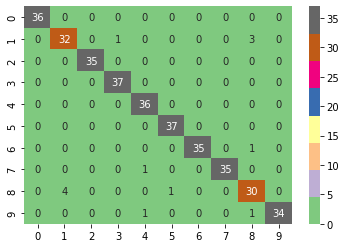

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

## 2. K-Nearesr Neghbors Classifier

In [66]:
model2 = KNeighborsClassifier()
params = {'n_neighbors': [3,5,9,11,15,19]}

search2 = RandomizedSearchCV(model2, params, cv=3, scoring='accuracy', verbose=15, n_jobs=3)
search2.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  15 out of  18 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=3,
                   param_distributions={'n_neighbors': [3, 5, 9, 11, 15, 19]},
                   scoring='accuracy', verbose=15)

In [67]:
search2.best_params_

{'n_neighbors': 3}

In [68]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_test)

In [69]:
acc2 = accuracy_score(y_test, y_pred)
acc2

0.9861111111111112

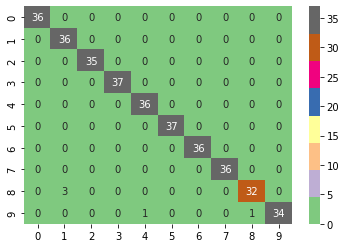

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

## 3. SVM

In [71]:
model3 = SVC()

params = {'C': [0.001,0.01,0.1,1,10],
          'kernel' : ['rbf', 'linear', 'poly']}

search3 = RandomizedSearchCV(model3, params, cv=3, scoring='accuracy', verbose=3, n_jobs=3)
search3.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    2.9s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=3,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   scoring='accuracy', verbose=3)

In [72]:
search3.best_params_

{'kernel': 'poly', 'C': 1}

In [73]:
clf3 = SVC(C=10, kernel='rbf')
clf3.fit(x_train, y_train)

y_pred = clf3.predict(x_test)

In [74]:
acc3 = accuracy_score(y_test, y_pred)
acc3

0.9944444444444445

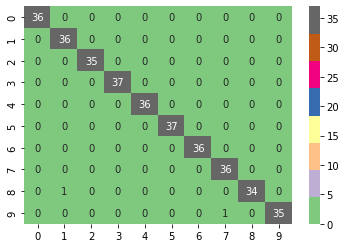

In [75]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

## 4. Decision Tree Classifier

In [76]:
model4 = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy', 'logloss'],
          'splitter': ['best', 'random'],
          'min_samples_split': [2,4,5,7]}

search4 = RandomizedSearchCV(model4, params, cv=3, scoring='accuracy', verbose=3, n_jobs=3)
search4.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=3,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'min_samples_split': [2, 4, 5, 7],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [77]:
search4.best_params_

{'splitter': 'best', 'min_samples_split': 2, 'criterion': 'entropy'}

In [78]:
clf4 = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2)
clf4.fit(x_train,y_train)

y_pred = clf4.predict(x_test)

In [79]:
acc4 = accuracy_score(y_test, y_pred)
acc4

0.8416666666666667

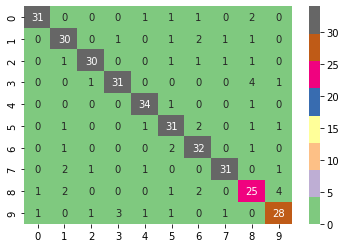

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

## 5. Random Forest Classifier

In [81]:
model5 = RandomForestClassifier()
params = {
'n_estimators': [50, 100, 150, 200, 500],
'criterion': ['gini', 'entropy'],
'max_depth':[3,6,9]
}

search5 = RandomizedSearchCV(model5, params, cv=3, scoring='accuracy',return_train_score=True, verbose=3, n_jobs=3)
search5.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:   18.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [50, 100, 150, 200,
                                                         500]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [82]:
search5.best_params_

{'n_estimators': 100, 'max_depth': 9, 'criterion': 'gini'}

In [91]:
clf5 = RandomForestClassifier(n_estimators=100, max_depth=9, criterion='gini')
clf5.fit(x_train, y_train)

y_pred = clf5.predict(x_test)

In [92]:
acc5 = accuracy_score(y_test, y_pred)
acc5

0.9638888888888889

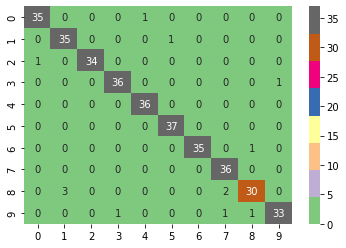

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

## 6. Stacking classifier

In [86]:
from xgboost import XGBClassifier

level0 = list()
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('RF', RandomForestClassifier()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('xgb', XGBClassifier()))

level1 = LogisticRegression()

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('cart', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                           

In [87]:
y_pred = model.predict(x_test)

In [88]:
acc6 = accuracy_score(y_test, y_pred)
acc6

0.9833333333333333

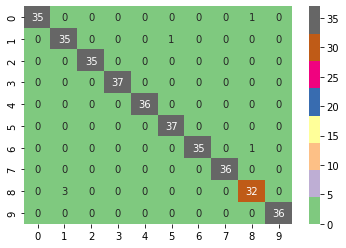

In [89]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Accent', fmt='g')

In [96]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["S.no", "Model", "Accuracy"]
x.add_row(['1','Logistic Regression',round(acc1*100,2)])
x.add_row(['2','K Neighbors Classifier',round(acc2*100,2)])
x.add_row(['3','SVM',round(acc3*100,2)])
x.add_row(['4','Decision Tree',round(acc4*100,2)])
x.add_row(['5','Random Forest',round(acc5*100,2)])
x.add_row(['6','Stacking Classifier',round(acc6*100,2)])
print(x)

+------+------------------------+----------+
| S.no |         Model          | Accuracy |
+------+------------------------+----------+
|  1   |  Logistic Regression   |  96.39   |
|  2   | K Neighbors Classifier |  98.61   |
|  3   |          SVM           |  99.44   |
|  4   |     Decision Tree      |  84.17   |
|  5   |     Random Forest      |  96.39   |
|  6   |  Stacking Classifier   |  98.33   |
+------+------------------------+----------+
